In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Sound Pressure
A sound can be described by means of the time-varying sound pressure, $p(t)$. The unit for sound pressure is the pascal, $Pa$. 
<br>
<br>
The following sound pressure thresholds are relevant in psychoacoustics:
- Absolute Threshold: $10^{-5} Pa$
- Pain Threshold: $10^2 Pa$ 

The sound pressure level, $L$, is a logrithmic measure of sound pressure. The relationship between the sound pressure and the sound pressure level is as follows:
$$ L = 20 log \left( \frac{p}{p_0} \right) dB $$
where $p_0$ is the reference value of the sound pressure, standardized to:
$$ p_0 = 20 \mu Pa $$

In [2]:
def sound_pressure_level(p):
    """Calculate the sound pressure level

    Parameters
    ----------
    p : float
        sound pressure (Pa)

    """
    p0 = 20e-6
    return 20 * np.log10(p/p0)

# Sound Intensity
Sound intensity, $I$, is related to sound pressure level as follows:
$$ L = 20 log \left( \frac{p}{p_0} \right) dB = 10 log \left( \frac{I}{I_0} \right) dB$$
where $I_0$ is the reference value of sound intensity, standardized to:
$$ I_0 = 10^{-12} \frac{W}{m^2} $$

In [ ]:
def sound_intensity_level(I):
    """Calculate the sound intensity level

    Parameters
    ----------
    I : float
        sound intensity (W/m^2)

    """
    I0 = 10e-12
    return 10 * np.log10(I/I0)

# Sound Density
Sound density is a measure of the sound intensity within a bandwidth of 1 Hz. It is useful measure when dealing with noises. The sound density is sometimes referred to as "noise power density", although this is not quite correct. The sound density level, $l$, is a logrithmic measure of sound density. For white noise, where the sound density level is independent of frequency, the sound desity level can be calculated using the following equation:
$$ l = L - 10 log \left( \frac{\Delta f}{Hz} \right) dB $$
where $\Delta f$ represents the bandwidth of the sound in question measured in Hz.

In [ ]:
def sound_density_level_for_white_noise(L, delta_f):
    """Calculate the sound density level for white noise in dB

    Parameters
    ----------
    L : float
        sound pressure level or sound intensity level (dB)
    delta_f : float
        bandwidth (Hz)

    """
    return L - 10 * np.log10(delta_f)

 # Commonly Used Stimuli in Psychoacoustics
 Illustrated below are several time functions and associated frequency spectra of stimuli commonly used in psychoacoustics.
 <br>
 <br>
![](images/audio_stimuli.png)
<br>From "_Psychoacoustics: Facts and models_" (4th ed., pp. 2–2) by Fastl, H., &amp; Zwicker, E. (2010).

## Tone
A tone is a continuous sinusoidal oscillation of the sound pressure $p$, as a function of time $t$. The equation for a tone is:
$$ p(t) = A sin(2 \pi f t + \theta) $$
where $A$ is the amplitude of the pressure change, $f$ is the tone frequency and $\theta$ is the phase of the sinusoidal oscillation. 
<br>
In the frequency domain, a pure tone results in a single spectral component at the tone frequency.

(0.0, 2000.0)

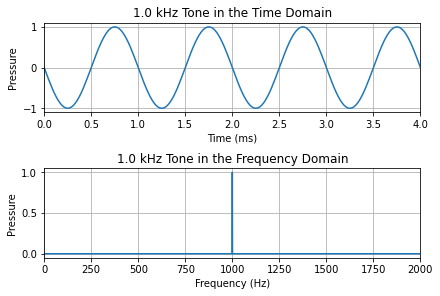

In [24]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Tone frequency
f_tone = 1e3

# Tone phase
theta_tone = 0

# Number of periods to plot
num_periods = 4

# Time
time = np.arange(0, 1, Ts)
time_ms = time * 1000

# Generate tone
tone = np.sin(2 * np.pi * f_tone * time + theta_tone)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot tone in the time domain
ax_time.grid()
ax_time.plot(time_ms, tone)
ax_time.set_title('{0} kHz Tone in the Time Domain'.format(f_tone/1000))
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, num_periods / f_tone * 1000))

# Plot tone in the frequency domain
N = len(time)
tone_fft = fft(tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(tone_fft[0:N//2]))
ax_freq.set_title('{0} kHz Tone in the Frequency Domain'.format(f_tone/1000))
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_tone))